# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

# Load The Data

In [3]:
X_train_org = pd.read_csv('loan_data_X_train.csv')
X_test_org = pd.read_csv('loan_data_X_test.csv')
y_train_org = pd.read_csv('loan_data_y_train.csv')
y_test_org = pd.read_csv('loan_data_y_test.csv')

# Explore Data

In [4]:
X_train_org.head()

,Unnamed: 0,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,mths_since_last_credit_pull_d:<58.25,mths_since_last_credit_pull_d:58.25-62.583,mths_since_last_credit_pull_d:62.583-65.833,mths_since_last_credit_pull_d:>65.833,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<198.2,mths_since_earliest_cr_line:198.2-303.4,mths_since_earliest_cr_line:303.4-387.56,mths_since_earliest_cr_line:387.56-450.68,mths_since_earliest_cr_line:>450.68
0,206712,36,16.99,551.65,D,10.0,MORTGAGE,165000.0,Source Verified,debt_consolidation,...,1,0,0,0,"(282.36, 303.4]",0,1,0,0,0
1,34869,36,16.55,339.24,D,1.0,RENT,100000.0,Not Verified,debt_consolidation,...,1,0,0,0,"(366.52, 387.56]",0,0,1,0,0
2,198316,36,6.89,770.68,A,4.0,MORTGAGE,275000.0,Verified,debt_consolidation,...,1,0,0,0,"(324.44, 345.48]",0,0,1,0,0
3,352433,60,13.99,255.90,C,3.0,RENT,51000.0,Source Verified,credit_card,...,1,0,0,0,"(261.32, 282.36]",0,1,0,0,0
4,60451,36,17.57,318.05,D,10.0,MORTGAGE,34500.0,Source Verified,debt_consolidation,...,1,0,0,0,"(219.24, 240.28]",0,1,0,0,0


In [5]:
y_train_org.head()

,good_bad
0,0
1,1
2,1
3,1
4,1


In [6]:
X_train_org.shape

(336875, 145)

In [7]:
X_test_org.shape

(84219, 145)

In [8]:
y_train_org.shape

(336875, 1)

In [9]:
y_test_org.shape

(84219, 1)

# Feature Selections

In [10]:
pd_model_all_cat = [ 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
 'home_ownership:OWN', 'home_ownership:RENT','home_ownership:MORT_ANY',
 'verification_status:Not Verified', 'verification_status:Source Verified', 'verification_status:Verified',
 'purpose:credit_card','purpose:debt_consolidation','purpose:wed_ren_en_smal_bus_mov_house', 'purpose:med_mj_pur_other', 'purpose:vac_car_home_imp_edu',
 'term:36','term:60',
 'int_rate:<8.16', 'int_rate:8.16-11.948', 'int_rate:11.948-14.788', 'int_rate:14.788-19.049', 'int_rate:>19.049',
 'emp_length:0-1','emp_length:2-5','emp_length:6-7','emp_length:8','emp_length:9','emp_length:10',
 'annual_inc:<20k','annual_inc:20k-30k','annual_inc:30k-40k','annual_inc:40k-50k','annual_inc:50k-60k','annual_inc:60k-70k','annual_inc:70k-80k','annual_inc:80k-90k',
 'annual_inc:90k-100k','annual_inc:100k-120k','annual_inc:120k-140k','annual_inc:>140k',
 'out_prncp:<1360','out_prncp:1360-8160','out_prncp:8160-13600','out_prncp:13600-23120','out_prncp:23120-31280','out_prncp:>31280',
 'total_pymnt:<4266.469','total_pymnt:4266.469-9599.556','total_pymnt:9599.556-16000','total_pymnt:>16000',
 'total_rec_int:<1249.39','total_rec_int:1249.39-2498.78','total_rec_int:2498.78-3998.048','total_rec_int:3998.048-5000','total_rec_int:>5000',
 'total_rev_hi_lim:<6320','total_rev_hi_lim:6320-22120','total_rev_hi_lim:22120-37920','total_rev_hi_lim:37920-47400','total_rev_hi_lim:47400-79000','total_rev_hi_lim:>79000',
 'inq_last_6mths:0','inq_last_6mths:1','inq_last_6mths:2','inq_last_6mths:3','inq_last_6mths:4','inq_last_6mths:5-6',
 'dti:<1.6','dti:1.6-4.799','dti:4.799-9.598','dti:9.598-15.996','dti:15.996-20.795','dti:20.795-25.594','dti:25.594-33.592','dti:>33.592',
 'revol_util:missing','revol_util:<32','revol_util:32-48','revol_util:48-60','revol_util:60-80','revol_util:80-100','revol_util:>100',
 'mths_since_last_credit_pull_d:missing','mths_since_last_credit_pull_d:<58.25','mths_since_last_credit_pull_d:58.25-62.583','mths_since_last_credit_pull_d:62.583-65.833','mths_since_last_credit_pull_d:>65.833',
 'mths_since_earliest_cr_line:<198.2','mths_since_earliest_cr_line:198.2-303.4','mths_since_earliest_cr_line:303.4-387.56','mths_since_earliest_cr_line:387.56-450.68','mths_since_earliest_cr_line:>450.68'
]

In [11]:
references = [ 'grade:G',
 'home_ownership:RENT',
 'verification_status:Source Verified',
 'purpose:debt_consolidation',
 'term:36',
 'int_rate:>19.049',
 'emp_length:0-1',
 'annual_inc:>140k',
 'out_prncp:<1360',
 'total_pymnt:<4266.469',
 'total_rec_int:>5000',
 'total_rev_hi_lim:>79000',
 'inq_last_6mths:3',
 'dti:25.594-33.592',
 'revol_util:>100',
 'mths_since_last_credit_pull_d:58.25-62.583',
 'mths_since_earliest_cr_line:<198.2'
]

In [12]:
X_train_all_cat = X_train_org[pd_model_all_cat]

In [13]:
X_train_all_cat.shape

(336875, 95)

In [14]:
X_train = X_train_all_cat.drop(references, axis =1)

In [15]:
X_train.shape

(336875, 78)

In [16]:
y_train = y_train_org.copy()

# PD model Estimation

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
reg = LogisticRegression(max_iter=1000, class_weight = 'balanced')

In [19]:
reg.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [20]:
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.
reg.intercept_

array([-7.53077356])

In [21]:
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.
reg.coef_

array([[-0.30161982,  0.19913299,  0.99284652,  1.02217415,  0.87824411,
         0.50851968,  0.02499285,  0.25392349,  0.1746217 ,  0.03468115,
         0.1012254 ,  0.0611367 ,  0.16003771,  0.0511783 ,  0.59229944,
         3.9635602 ,  2.53959953,  1.04802751,  0.37839901,  0.18694807,
         0.04445237,  0.37626783,  0.31677074,  0.29406678,  0.69015496,
         0.64401277,  0.45878698,  0.41690587,  0.31279151,  0.41340573,
         0.23451457,  0.22518258,  0.22379821,  0.10456388,  0.19306687,
         2.90555239,  2.75514627,  2.84345877,  2.97507732,  2.96373994,
         1.01831367,  3.47945671,  5.82519455,  0.55912236, -0.52157745,
        -1.05038336, -0.53240103,  0.14391117,  0.10413311,  0.18621075,
         0.01768712,  0.14445137,  0.26089038,  0.14362077,  0.18055347,
         0.13252044, -0.16141657,  0.18698155,  0.22028579,  0.39260185,
         0.28887002,  0.19273734,  0.13506835,  0.02299157, -0.33452443,
         0.35895185,  0.55032162,  0.53525217,  0.5

In [22]:
feature_names = X_train.columns.values

#### Model Evaluation

In [23]:
X_test_all_category = X_test_org[pd_model_all_cat]

In [24]:
X_test = X_test_all_category.drop(references, axis =1)

In [25]:
y_test = y_test_org.copy()

In [26]:
predictions = reg.predict(X_test)

In [27]:
prediction_proba = reg.predict_proba(X_test)

In [28]:
prediction_proba = prediction_proba[:][:,1]

In [29]:
test_temp = y_test.copy()

In [30]:
test_temp.reset_index(drop= True, inplace=True)

In [31]:
test_proba = pd.concat([test_temp, pd.DataFrame(prediction_proba)],axis=1)

In [32]:
test_proba.columns = ['Actual','Predict Proba']

In [33]:
test_proba.head()

,Actual,Predict Proba
0,1,0.770497
1,1,0.657140
2,1,0.429429
3,1,0.821462
4,1,0.392545


In [34]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc

In [35]:
# assign a threshold value to differentiate good with bad
tr = 0.5
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimat threshold later in this project
test_proba['Predictions'] = np.where(test_proba['Predict Proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(test_proba['Actual'], test_proba['Predictions'], normalize='all')

array([[0.01276434, 0.00587753],
       [0.21872737, 0.76263076]])

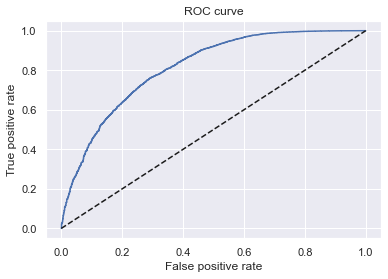

In [36]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(test_proba['Actual'], test_proba['Predict Proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [37]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
AUROC = roc_auc_score(test_proba['Actual'], test_proba['Predict Proba'])
AUROC

0.8137284154547205

In [38]:
# calculate Gini from AUROC
Gini = AUROC * 2 - 1
Gini

0.627456830909441

#### create a summary table

In [39]:
pd.options.display.max_rows = None

In [40]:
summary_table = pd.DataFrame(data=feature_names, columns=['Feature Name'])
summary_table['Coefficient'] = np.transpose(reg.coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table.sort_index(inplace=True)
summary_table

,Feature Name,Coefficient
0,Intercept,-7.530774
1,grade:A,-0.301620
2,grade:B,0.199133
3,grade:C,0.992847
4,grade:D,1.022174
5,grade:E,0.878244
6,grade:F,0.508520
7,home_ownership:OWN,0.024993
8,home_ownership:MORT_ANY,0.253923
9,verification_status:Not Verified,0.174622


#### create a score card

In [41]:
references

['grade:G',
 'home_ownership:RENT',
 'verification_status:Source Verified',
 'purpose:debt_consolidation',
 'term:36',
 'int_rate:>19.049',
 'emp_length:0-1',
 'annual_inc:>140k',
 'out_prncp:<1360',
 'total_pymnt:<4266.469',
 'total_rec_int:>5000',
 'total_rev_hi_lim:>79000',
 'inq_last_6mths:3',
 'dti:25.594-33.592',
 'revol_util:>100',
 'mths_since_last_credit_pull_d:58.25-62.583',
 'mths_since_earliest_cr_line:<198.2']

In [42]:
df_references = pd.DataFrame(data=references, columns=['Feature Name'])
df_references['Coefficient'] = 0
df_references

,Feature Name,Coefficient
0,grade:G,0
1,home_ownership:RENT,0
2,verification_status:Source Verified,0
3,purpose:debt_consolidation,0
4,term:36,0
5,int_rate:>19.049,0
6,emp_length:0-1,0
7,annual_inc:>140k,0
8,out_prncp:<1360,0
9,total_pymnt:<4266.469,0


In [43]:
df_scorecard = pd.concat([summary_table, df_references], axis=0)
df_scorecard.reset_index(drop=True, inplace=True)
df_scorecard

,Feature Name,Coefficient
0,Intercept,-7.530774
1,grade:A,-0.301620
2,grade:B,0.199133
3,grade:C,0.992847
4,grade:D,1.022174
5,grade:E,0.878244
6,grade:F,0.508520
7,home_ownership:OWN,0.024993
8,home_ownership:MORT_ANY,0.253923
9,verification_status:Not Verified,0.174622


In [44]:
# Collect the Original Feature Name, which is the string before :
df_scorecard['Original Feature Name'] = df_scorecard['Feature Name'].apply(lambda x: x.split(':')[0])
df_scorecard

,Feature Name,Coefficient,Original Feature Name
0,Intercept,-7.530774,Intercept
1,grade:A,-0.301620,grade
2,grade:B,0.199133,grade
3,grade:C,0.992847,grade
4,grade:D,1.022174,grade
5,grade:E,0.878244,grade
6,grade:F,0.508520,grade
7,home_ownership:OWN,0.024993,home_ownership
8,home_ownership:MORT_ANY,0.253923,home_ownership
9,verification_status:Not Verified,0.174622,verification_status


In [45]:
# according to FICO, minimum and maximum scorecard scores are 300 and 850 respectively
min_score = 300
max_score = 850

In [46]:
min_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficient'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-11.793285803267112

In [47]:
max_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficient'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

11.868701095330346

In [48]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficient'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,Feature Name,Coefficient,Original Feature Name,Score - Calculation
0,Intercept,-7.530774,Intercept,-175.045548
1,grade:A,-0.301620,grade,-7.010861
2,grade:B,0.199133,grade,4.628654
3,grade:C,0.992847,grade,23.077757
4,grade:D,1.022174,grade,23.759449
5,grade:E,0.878244,grade,20.413935
6,grade:F,0.508520,grade,11.820048
7,home_ownership:OWN,0.024993,home_ownership,0.580935
8,home_ownership:MORT_ANY,0.253923,home_ownership,5.902206
9,verification_status:Not Verified,0.174622,verification_status,4.058912


In [49]:
# recalculate intercept score
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficient'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

<ipython-input-49-ebdba74dae12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficient'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,Feature Name,Coefficient,Original Feature Name,Score - Calculation
0,Intercept,-7.530774,Intercept,399.077975
1,grade:A,-0.301620,grade,-7.010861
2,grade:B,0.199133,grade,4.628654
3,grade:C,0.992847,grade,23.077757
4,grade:D,1.022174,grade,23.759449
5,grade:E,0.878244,grade,20.413935
6,grade:F,0.508520,grade,11.820048
7,home_ownership:OWN,0.024993,home_ownership,0.580935
8,home_ownership:MORT_ANY,0.253923,home_ownership,5.902206
9,verification_status:Not Verified,0.174622,verification_status,4.058912


In [50]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,Feature Name,Coefficient,Original Feature Name,Score - Calculation,Score - Preliminary
0,Intercept,-7.530774,Intercept,399.077975,399.0
1,grade:A,-0.301620,grade,-7.010861,-7.0
2,grade:B,0.199133,grade,4.628654,5.0
3,grade:C,0.992847,grade,23.077757,23.0
4,grade:D,1.022174,grade,23.759449,24.0
5,grade:E,0.878244,grade,20.413935,20.0
6,grade:F,0.508520,grade,11.820048,12.0
7,home_ownership:OWN,0.024993,home_ownership,0.580935,1.0
8,home_ownership:MORT_ANY,0.253923,home_ownership,5.902206,6.0
9,verification_status:Not Verified,0.174622,verification_status,4.058912,4.0


In [51]:
min_sum_score_prel = df_scorecard.groupby('Original Feature Name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [52]:
max_sum_score_prel = df_scorecard.groupby('Original Feature Name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

In [53]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']

#### Calculate Credit Score

In [54]:
X_test_all_category.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OWN,home_ownership:RENT,home_ownership:MORT_ANY,...,mths_since_last_credit_pull_d:missing,mths_since_last_credit_pull_d:<58.25,mths_since_last_credit_pull_d:58.25-62.583,mths_since_last_credit_pull_d:62.583-65.833,mths_since_last_credit_pull_d:>65.833,mths_since_earliest_cr_line:<198.2,mths_since_earliest_cr_line:198.2-303.4,mths_since_earliest_cr_line:303.4-387.56,mths_since_earliest_cr_line:387.56-450.68,mths_since_earliest_cr_line:>450.68
0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [55]:
df_scorecard

,Feature Name,Coefficient,Original Feature Name,Score - Calculation,Score - Preliminary,Score - Final
0,Intercept,-7.530774,Intercept,399.077975,399.0,399.0
1,grade:A,-0.301620,grade,-7.010861,-7.0,-7.0
2,grade:B,0.199133,grade,4.628654,5.0,5.0
3,grade:C,0.992847,grade,23.077757,23.0,23.0
4,grade:D,1.022174,grade,23.759449,24.0,24.0
5,grade:E,0.878244,grade,20.413935,20.0,20.0
6,grade:F,0.508520,grade,11.820048,12.0,12.0
7,home_ownership:OWN,0.024993,home_ownership,0.580935,1.0,1.0
8,home_ownership:MORT_ANY,0.253923,home_ownership,5.902206,6.0,6.0
9,verification_status:Not Verified,0.174622,verification_status,4.058912,4.0,4.0


In [56]:
X_test_all_category_w_intercept = X_test_all_category

In [57]:
X_test_all_category_w_intercept.insert(0, 'Intercept',1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [58]:
X_test_all_category_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OWN,home_ownership:RENT,...,mths_since_last_credit_pull_d:missing,mths_since_last_credit_pull_d:<58.25,mths_since_last_credit_pull_d:58.25-62.583,mths_since_last_credit_pull_d:62.583-65.833,mths_since_last_credit_pull_d:>65.833,mths_since_earliest_cr_line:<198.2,mths_since_earliest_cr_line:198.2-303.4,mths_since_earliest_cr_line:303.4-387.56,mths_since_earliest_cr_line:387.56-450.68,mths_since_earliest_cr_line:>450.68
0,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [59]:
X_test_all_category_w_intercept = X_test_all_category_w_intercept[df_scorecard['Feature Name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [60]:
X_test_all_category_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORT_ANY,verification_status:Not Verified,...,annual_inc:>140k,out_prncp:<1360,total_pymnt:<4266.469,total_rec_int:>5000,total_rev_hi_lim:>79000,inq_last_6mths:3,dti:25.594-33.592,revol_util:>100,mths_since_last_credit_pull_d:58.25-62.583,mths_since_earliest_cr_line:<198.2
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
scorecard_scores = df_scorecard['Score - Final']

In [62]:
scorecard_scores.shape

(96,)

In [63]:
scorecard_scores = scorecard_scores.values.reshape(96, 1)

In [64]:
y_scores = X_test_all_category_w_intercept.dot(scorecard_scores)

In [65]:
y_scores.head()

,0
0,602.0
1,590.0
2,567.0
3,608.0
4,564.0


In [66]:
y_scores.tail()

,0
84214,578.0
84215,585.0
84216,569.0
84217,516.0
84218,615.0


## From Credit Score to PD

In [67]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [68]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

,0
0,0.768400
1,0.664416
2,0.423977
3,0.811139
4,0.392806


In [69]:
prediction_proba[0:5]

array([0.77049684, 0.65714043, 0.42942888, 0.82146191, 0.39254542])

### Setting Cut-offs

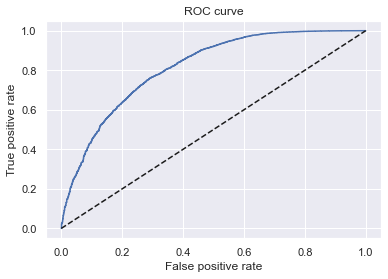

In [70]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(test_proba['Actual'], test_proba['Predict Proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [71]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [72]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [73]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.999821,0.000000,0.000000
1,0.999821,0.000000,0.000012
2,0.998929,0.000000,0.000218
3,0.998884,0.000637,0.000218
4,0.991212,0.000637,0.003267


In [74]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [75]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [76]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,1070.0
1,0.999821,0.000000,0.000012,775.0
2,0.998929,0.000000,0.000218,733.0
3,0.998884,0.000637,0.000218,732.0
4,0.991212,0.000637,0.003267,684.0


In [77]:
df_cutoffs['Score'][0] = max_score

In [78]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.999821,0.000000,0.000012,775.0
2,0.998929,0.000000,0.000218,733.0
3,0.998884,0.000637,0.000218,732.0
4,0.991212,0.000637,0.003267,684.0


In [79]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(test_proba['Predict Proba'] >= p, 1, 0).sum()

In [80]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = test_proba['Predict Proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / test_proba['Predict Proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [81]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,84219,0.000000,1.000000
1,0.999821,0.000000,0.000012,775.0,1,84218,0.000012,0.999988
2,0.998929,0.000000,0.000218,733.0,18,84201,0.000214,0.999786
3,0.998884,0.000637,0.000218,732.0,19,84200,0.000226,0.999774
4,0.991212,0.000637,0.003267,684.0,271,83948,0.003218,0.996782


In [82]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
4055,0.009993,0.994904,0.999976,467.0,84209,10,0.999881,0.000119
4056,0.009250,0.994904,0.999988,465.0,84210,9,0.999893,0.000107
4057,0.008638,0.996178,0.999988,464.0,84212,7,0.999917,0.000083
4058,0.008517,0.996178,1.000000,464.0,84213,6,0.999929,0.000071
4059,0.004959,1.000000,1.000000,451.0,84219,0,1.000000,0.000000


In [90]:
# for example find approve rate 90%
df_cutoffs[(df_cutoffs['Approval Rate']>0.90) &(df_cutoffs['Approval Rate']<0.91)]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
2832,0.360039,0.471975,0.908384,561.0,75818,8401,0.900248,0.099752
2833,0.360024,0.472611,0.908384,561.0,75819,8400,0.900260,0.099740
2834,0.359400,0.472611,0.908795,561.0,75853,8366,0.900664,0.099336
2835,0.359399,0.473248,0.908795,561.0,75854,8365,0.900676,0.099324
2836,0.359377,0.473248,0.908807,561.0,75855,8364,0.900687,0.099313
2837,0.359377,0.473885,0.908807,561.0,75856,8363,0.900699,0.099301
2838,0.359068,0.473885,0.908989,561.0,75871,8348,0.900877,0.099123
2839,0.359054,0.473885,0.909013,561.0,75873,8346,0.900901,0.099099
2840,0.357837,0.473885,0.909811,561.0,75939,8280,0.901685,0.098315
2841,0.357814,0.474522,0.909811,561.0,75940,8279,0.901697,0.098303


In [87]:
df_cutoffs[df_cutoffs['thresholds'].between(0.5, 0.51)]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
2161,0.509989,0.298089,0.765418,575.0,63729,20490,0.756706,0.243294
2162,0.509978,0.298726,0.765418,575.0,63730,20489,0.756718,0.243282
2163,0.509889,0.298726,0.765599,575.0,63745,20474,0.756896,0.243104
2164,0.509877,0.299363,0.765599,575.0,63746,20473,0.756908,0.243092
2165,0.509646,0.299363,0.765865,575.0,63768,20451,0.757169,0.242831
2166,0.509642,0.300000,0.765865,575.0,63769,20450,0.757181,0.242819
2167,0.509403,0.300000,0.766168,575.0,63794,20425,0.757478,0.242522
2168,0.509390,0.300000,0.766192,575.0,63796,20423,0.757501,0.242499
2169,0.509263,0.300000,0.766410,575.0,63814,20405,0.757715,0.242285
2170,0.509260,0.300000,0.766434,575.0,63816,20403,0.757739,0.242261


In [86]:
df_cutoffs['thresholds'].count()

4060

In [88]:
# Calculate Youden's J-Statistic to identify the best threshhold
J = tpr - fpr
# locate the index of the largest J
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold: %f' % (best_thresh))

Best Threshold: 0.521494


In [89]:
# let's have a look at the approval and rejection rates at our ideal threshold
df_cutoffs[df_cutoffs['thresholds'].between(0.521494, 0.521495)]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
2094,0.521494,0.281529,0.750414,576.0,62463,21756,0.741673,0.258327
